Edward Lee<br>CISC 3440<br>Stock Price Prediction Project<br>Prof. McNiell<br>Brooklyn College


Stocks to predict: $SPY (S&P 500 ETF: Amazon, Apple, Google, Microsoft, Tesla, etc.), BAC (Bank of America), and WMT (Walmart). Using the data from Kaggle (https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs), the CSV data contains from 1972 to 2017 stock market prices of Open, High, Low, Close, Volume, and OpenInt. 

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from keras.layers import LSTM

In [ ]:
df_Spy = pd.read_csv("https://raw.githubusercontent.com/Ed-ward239/3440-ML-FinalProject/main/csv/spy.csv")
df_Bac = pd.read_csv("https://raw.githubusercontent.com/Ed-ward239/3440-ML-FinalProject/main/csv/bac.csv")
df_Wmt = pd.read_csv("https://raw.githubusercontent.com/Ed-ward239/3440-ML-FinalProject/main/csv/wmt.csv")

In [ ]:
df_Spy.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,104.77,106.00,104.68,105.79,70221808,0
1,2005-02-28,105.55,105.68,104.56,105.08,79695344,0
2,2005-03-01,105.22,105.87,105.22,105.62,54607412,0
3,2005-03-02,105.21,106.22,105.10,105.57,73733090,0
4,2005-03-03,105.99,106.20,105.15,105.61,71286823,0


In [ ]:
df_Bac.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-05-29,3.6107,3.6389,3.6107,3.6295,16691365,0
1,1986-05-30,3.6107,3.6578,3.6107,3.6578,6895475,0
2,1986-06-02,3.6578,3.6768,3.6295,3.6485,333487,0
3,1986-06-03,3.6389,3.6768,3.6295,3.6768,163776,0
4,1986-06-04,3.6485,3.6768,3.6204,3.6204,203654,0


In [ ]:
df_Wmt.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1972-03-20,0.03403,0.03403,0.03403,0.03403,3132119,0
1,1972-03-22,0.03403,0.04251,0.03403,0.03403,1084194,0
2,1972-03-23,0.03403,0.04251,0.03403,0.03403,783030,0
3,1972-03-24,0.03403,0.04251,0.03403,0.03403,1264892,0
4,1972-03-27,0.04251,0.04251,0.04251,0.04251,1385361,0


In [ ]:
print("SPY Data Shape: ", df_Spy.shape)

SPY Data Shape:  (3201, 7)


In [ ]:
print("BAC Data Shape: ", df_Bac.shape)

BAC Data Shape:  (7929, 7)


In [ ]:
print("WMT Data Shape: ", df_Wmt.shape)

WMT Data Shape:  (11443, 7)


In [ ]:
df_Spy.describe()

,Open,High,Low,Close,Volume,OpenInt
count,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3201.0
mean,141.258585,142.007112,140.437356,141.275289,1.680534e+08,0.0
std,46.507791,46.491560,46.535443,46.534009,1.180913e+08,0.0
min,59.195000,60.982000,58.455000,59.334000,1.752828e+07,0.0
25%,107.810000,108.380000,107.010000,107.720000,8.523352e+07,0.0
50%,123.610000,124.250000,122.730000,123.550000,1.336313e+08,0.0
75%,183.680000,184.870000,182.450000,183.700000,2.131654e+08,0.0
max,258.970000,259.350000,258.220000,259.110000,1.000440e+09,0.0


In [ ]:
df_Bac.describe()

,Open,High,Low,Close,Volume,OpenInt
count,7929.000000,7929.000000,7929.000000,7929.000000,7.929000e+03,7929.0
mean,18.887528,19.104507,18.663544,18.883879,5.441999e+07,0.0
std,13.094110,13.198901,12.988605,13.093593,1.027980e+08,0.0
min,2.281400,2.347600,2.177700,2.309600,0.000000e+00,0.0
25%,8.088900,8.173800,7.975600,8.088900,2.700149e+06,0.0
50%,15.169000,15.355000,15.018000,15.169000,1.063512e+07,0.0
75%,26.984000,27.445000,26.623000,27.058000,7.076684e+07,0.0
max,51.890000,51.928000,51.683000,51.757000,2.423735e+09,0.0


In [ ]:
df_Wmt.describe()

,Open,High,Low,Close,Volume,OpenInt
count,11443.000000,11443.000000,11443.000000,11443.000000,1.144300e+04,11443.0
mean,23.999115,24.227797,23.769176,24.003380,8.656755e+06,0.0
std,24.807570,25.011432,24.613717,24.815602,7.417169e+06,0.0
min,0.008210,0.008210,0.008210,0.008210,0.000000e+00,0.0
25%,0.901100,0.917800,0.892500,0.901100,4.275366e+06,0.0
50%,10.744000,10.848000,10.617000,10.735000,7.097376e+06,0.0
75%,45.094000,45.533500,44.652000,45.080500,1.097780e+07,0.0
max,90.240000,91.690000,90.200000,90.920000,1.550925e+08,0.0


In [ ]:
print("Null Column:\n", df_Spy.isna().sum())

Null Column:
 Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64


<h1>Preprocessing Data

In [ ]:
spy_train_size = int(len(df_Spy)*0.80)
spy_dataLen = len(df_Spy)
train_Spy, test_Spy = df_Spy[0:spy_train_size],df_Spy[spy_train_size:spy_dataLen]

In [ ]:
print("Training Size: ", spy_train_size)
print("total length of data: ", spy_dataLen)
print("Train length: ", len(train_Spy))
print("Test length: ", len(test_Spy))

Training Size:  2560
total length of data:  3201
Train length:  2560
Test length:  641


In [ ]:
bac_train_size = int(len(df_Bac)*0.80)
bac_dataLen = len(df_Bac)
train_bac, test_bac = df_Bac[0:bac_train_size], df_Bac[bac_train_size:bac_dataLen]

In [ ]:
print("Training Size: ", bac_train_size)
print("total length of data: ", bac_dataLen)
print("Train length: ", len(train_bac))
print("Test length: ", len(test_bac))

Training Size:  6343
total length of data:  7929
Train length:  6343
Test length:  1586


In [ ]:
wmt_train_size = int(len(df_Wmt)*0.80)
wmt_dataLen = len(df_Wmt)
train_wmt, test_wmt = df_Wmt[0:wmt_train_size], df_Wmt[wmt_train_size:wmt_dataLen]

In [ ]:
print("Training Size: ", wmt_train_size)
print("total length of data: ", wmt_dataLen)
print("Train length: ", len(train_wmt))
print("Test length: ", len(test_wmt))

Training Size:  9154
total length of data:  11443
Train length:  9154
Test length:  2289


<h1>Normalize The Data

In [ ]:
train_Spy1 = train_Spy.loc[:, ["Open"]].values
spy_scaler = MinMaxScaler(feature_range=(0,1))
spy_train_scaled = spy_scaler.fit_transform(train_Spy1)

In [ ]:
# Split the data in X_train and y_train, use the timesteps = 40
spy_endlen = len(spy_train_scaled)
X_train_spy = []
y_train_spy = []
timesteps_spy = 40

for i in range(timesteps_spy, spy_endlen):
    X_train_spy.append(spy_train_scaled[i - timesteps_spy:i, 0])
    y_train_spy.append(spy_train_scaled[i, 0])
X_train_spy, y_train_spy = np.array(X_train_spy), np.array(y_train_spy)

In [ ]:
X_train_spy = np.reshape(X_train_spy, (X_train_spy.shape[0], X_train_spy.shape[1], 1))
print("X_train: ", X_train_spy.shape)
print("y_train: ", y_train_spy.shape)

X_train:  (2520, 40, 1)
y_train:  (2520,)


In [ ]:
train_bac1 = train_bac.loc[:, ["Open"]].values
bac_scaler = MinMaxScaler(feature_range=(0,1))
bac_train_scaled = bac_scaler.fit_transform(train_bac1)


bac_endlen = len(bac_train_scaled)
X_train_bac = []
y_train_bac = []
timesteps_bac = 40

for i in range(timesteps_bac, bac_endlen):
    X_train_bac.append(bac_train_scaled[i - timesteps_bac:i, 0])
    y_train_bac.append(bac_train_scaled[i, 0])
X_train_bac, y_train_bac = np.array(X_train_bac), np.array(y_train_bac)

X_train_bac = np.reshape(X_train_bac, (X_train_bac.shape[0], X_train_bac.shape[1], 1))
print("X_train: ", X_train_bac.shape)
print("y_train: ", y_train_bac.shape)

X_train:  (6303, 40, 1)
y_train:  (6303,)


In [ ]:
train_wmt1 = train_wmt.loc[:, ["Open"]].values
wmt_scaler = MinMaxScaler(feature_range=(0,1))
wmt_train_scaled = wmt_scaler.fit_transform(train_wmt1)


wmt_endlen = len(wmt_train_scaled)
X_train_wmt = []
y_train_wmt = []
timesteps_wmt = 40

for i in range(timesteps_wmt, wmt_endlen):
    X_train_wmt.append(wmt_train_scaled[i - timesteps_wmt:i, 0])
    y_train_wmt.append(wmt_train_scaled[i, 0])
X_train_wmt, y_train_wmt = np.array(X_train_wmt), np.array(y_train_wmt)

X_train_wmt = np.reshape(X_train_wmt, (X_train_wmt.shape[0], X_train_wmt.shape[1], 1))
print("X_train: ", X_train_wmt.shape)
print("y_train: ", y_train_wmt.shape)

X_train:  (9114, 40, 1)
y_train:  (9114,)


Use Simple RNN with hyperbolic tangent and Adam's optimizer

In [ ]:
regressor_spy = Sequential()
regressor_spy.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train_spy.shape[1],1)))
regressor_spy.add(Dropout(0.2))

regressor_spy.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor_spy.add(Dropout(0.2))

regressor_spy.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor_spy.add(Dropout(0.2))

regressor_spy.add(SimpleRNN(units = 50))
regressor_spy.add(Dropout(0.2))

regressor_spy.add(Dense(units = 1))

In [ ]:
regressor_bac = Sequential()
regressor_bac.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train_bac.shape[1],1)))
regressor_bac.add(Dropout(0.2))

regressor_bac.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor_bac.add(Dropout(0.2))

regressor_bac.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor_bac.add(Dropout(0.2))

regressor_bac.add(SimpleRNN(units = 50))
regressor_bac.add(Dropout(0.2))

regressor_bac.add(Dense(units = 1))

In [ ]:
regressor_wmt = Sequential()
regressor_wmt.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train_wmt.shape[1],1)))
regressor_wmt.add(Dropout(0.2))

regressor_wmt.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor_wmt.add(Dropout(0.2))

regressor_wmt.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor_wmt.add(Dropout(0.2))

regressor_wmt.add(SimpleRNN(units = 50))
regressor_wmt.add(Dropout(0.2))

regressor_wmt.add(Dense(units = 1))

In [ ]:
regressor_spy.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
regressor_bac.compile(optimizer = "Adam", loss = "mse")

In [ ]:
regressor_wmt.compile(optimizer = "Adam", loss = "mse")

In [ ]:
regressor_spy.fit(X_train_spy, y_train_spy, epochs = 100, batch_size = 20)

Epoch 1/100
126/126 [==============================] - 15s 74ms/step - loss: 0.2798
Epoch 2/100
126/126 [==============================] - 6s 44ms/step - loss: 0.1164
Epoch 3/100
126/126 [==============================] - 4s 32ms/step - loss: 0.0665
Epoch 4/100
126/126 [==============================] - 4s 32ms/step - loss: 0.0391
Epoch 5/100
126/126 [==============================] - 4s 32ms/step - loss: 0.0301
Epoch 6/100
126/126 [==============================] - 4s 32ms/step - loss: 0.0206
Epoch 7/100
126/126 [==============================] - 4s 32ms/step - loss: 0.0155
Epoch 8/100
126/126 [==============================] - 4s 33ms/step - loss: 0.0119
Epoch 9/100
126/126 [==============================] - 4s 32ms/step - loss: 0.0101
Epoch 10/100
126/126 [==============================] - 4s 32ms/step - loss: 0.0086
Epoch 11/100
126/126 [==============================] - 4s 32ms/step - loss: 0.0073
Epoch 12/100
126/126 [==============================] - 4s 32ms/step - loss: 0.0061


In [ ]:
regressor_bac.fit(X_train_bac, y_train_bac, epochs = 100, batch_size = 20)

Epoch 1/100
316/316 [==============================] - 15s 37ms/step - loss: 0.1783
Epoch 2/100
316/316 [==============================] - 12s 37ms/step - loss: 0.0392
Epoch 3/100
316/316 [==============================] - 12s 36ms/step - loss: 0.0180
Epoch 4/100
316/316 [==============================] - 11s 36ms/step - loss: 0.0108
Epoch 5/100
316/316 [==============================] - 12s 39ms/step - loss: 0.0074
Epoch 6/100
316/316 [==============================] - 11s 36ms/step - loss: 0.0052
Epoch 7/100
316/316 [==============================] - 11s 36ms/step - loss: 0.0043
Epoch 8/100
316/316 [==============================] - 15s 47ms/step - loss: 0.0035
Epoch 9/100
316/316 [==============================] - 12s 37ms/step - loss: 0.0030
Epoch 10/100
316/316 [==============================] - 11s 36ms/step - loss: 0.0025
Epoch 11/100
316/316 [==============================] - 11s 36ms/step - loss: 0.0021
Epoch 12/100
316/316 [==============================] - 11s 36ms/step - lo

In [ ]:
regressor_wmt.fit(X_train_wmt, y_train_wmt, epochs = 100, batch_size = 20)

Epoch 1/100
456/456 [==============================] - 19s 36ms/step - loss: 0.1277
Epoch 2/100
456/456 [==============================] - 16s 36ms/step - loss: 0.0215
Epoch 3/100
456/456 [==============================] - 17s 37ms/step - loss: 0.0104
Epoch 4/100
456/456 [==============================] - 16s 36ms/step - loss: 0.0060
Epoch 5/100
456/456 [==============================] - 18s 39ms/step - loss: 0.0043
Epoch 6/100
456/456 [==============================] - 16s 36ms/step - loss: 0.0032
Epoch 7/100
456/456 [==============================] - 17s 37ms/step - loss: 0.0026
Epoch 8/100
456/456 [==============================] - 17s 36ms/step - loss: 0.0022
Epoch 9/100
456/456 [==============================] - 17s 37ms/step - loss: 0.0019
Epoch 10/100
456/456 [==============================] - 16s 36ms/step - loss: 0.0018
Epoch 11/100
456/456 [==============================] - 16s 36ms/step - loss: 0.0016
Epoch 12/100
456/456 [==============================] - 16s 36ms/step - lo

<h1>Prediction

In [ ]:
test_Spy.head()

,Date,Open,High,Low,Close,Volume,OpenInt
2560,2015-04-30,199.36,199.82,197.21,198.03,169805170,0
2561,2015-05-01,198.92,200.22,198.81,200.17,108848607,0
2562,2015-05-04,200.66,201.41,200.53,200.75,74664891,0
2563,2015-05-05,200.46,200.88,198.29,198.45,119298103,0
2564,2015-05-06,199.07,199.41,196.43,197.62,142107790,0


In [ ]:
test_bac.head()

,Date,Open,High,Low,Close,Volume,OpenInt
6343,2011-07-27,9.3692,9.3869,9.1406,9.1406,159693921,0
6344,2011-07-28,9.1798,9.3030,9.1521,9.2457,120059700,0
6345,2011-07-29,9.1029,9.3980,9.0654,9.1702,198714212,0
6346,2011-08-01,9.4815,9.4905,9.1596,9.2628,168429003,0
6347,2011-08-02,9.2170,9.3130,8.9436,8.9626,183394564,0


In [ ]:
test_wmt.head()

,Date,Open,High,Low,Close,Volume,OpenInt
9154,2008-10-10,41.677,46.098,39.952,43.309,60688828,0
9155,2008-10-13,44.778,46.505,43.522,46.328,34767857,0
9156,2008-10-14,47.626,47.662,44.814,46.275,32660329,0
9157,2008-10-15,45.424,45.560,42.399,42.544,32870600,0
9158,2008-10-16,42.988,46.771,41.420,46.429,55747818,0


In [ ]:
spy_realprice = test_Spy.loc[:, ["Open"]].values
print("SPY Real Price Shape: ", spy_realprice.shape)

SPY Real Price Shape:  (641, 1)


In [ ]:
bac_realprice = test_bac.loc[:, ["Open"]].values
print("BAC Real Price Shape: ", bac_realprice.shape)

BAC Real Price Shape:  (1586, 1)


In [ ]:
wmt_realprice = test_wmt.loc[:, ["Open"]].values
print("WMT Real Price Shape: ", wmt_realprice.shape)

WMT Real Price Shape:  (2289, 1)


In [ ]:
spy_dataset_tol = pd.concat((df_Spy["Open"], test_Spy["Open"]), axis = 0)
spy_inputs = spy_dataset_tol[len(spy_dataset_tol) - len(test_Spy) - timesteps_spy:].values.reshape(-1,1)
spy_inputs = spy_scaler.transform(spy_inputs)

In [ ]:
X_test_spy = []
for i in range(timesteps_spy, 681):
  X_test_spy.append(spy_inputs[i-timesteps_spy:i, 0])
X_test_spy = np.array(X_test_spy)

print("X_test Shape (SPY): ", X_test_spy.shape)

X_test Shape (SPY):  (641, 40)


In [ ]:
X_test_spy = np.reshape(X_test_spy, (X_test_spy.shape[0], X_test_spy.shape[1], 1))
predict_spy = regressor_spy.predict(X_test_spy)
predict_spy = spy_scaler.inverse_transform(predict_spy)

21/21 [==============================] - 1s 12ms/step


In [ ]:
bac_dataset_tol = pd.concat((df_Bac["Open"], test_bac["Open"]), axis = 0)
bac_inputs = bac_dataset_tol[len(bac_dataset_tol) - len(test_bac) - timesteps_bac:].values.reshape(-1,1)
bac_inputs = bac_scaler.transform(bac_inputs)

X_test_bac = []
for i in range(timesteps_bac, 1626):
  X_test_bac.append(bac_inputs[i-timesteps_bac:i, 0])
X_test_bac = np.array(X_test_bac)

print("X_test Shape (BAC): ", X_test_bac.shape)

X_test Shape (BAC):  (1586, 40)


In [ ]:
X_test_bac = np.reshape(X_test_bac, (X_test_bac.shape[0], X_test_bac.shape[1], 1))
predict_bac = regressor_bac.predict(X_test_bac)
predict_bac = bac_scaler.inverse_transform(predict_bac)

50/50 [==============================] - 1s 12ms/step


In [ ]:
wmt_dataset_tol = pd.concat((df_Wmt["Open"], test_wmt["Open"]), axis = 0)
wmt_inputs = wmt_dataset_tol[len(wmt_dataset_tol) - len(test_wmt) - timesteps_wmt:].values.reshape(-1,1)
wmt_inputs = wmt_scaler.transform(wmt_inputs)

X_test_wmt = []
for i in range(timesteps_wmt, 2329):
  X_test_wmt.append(wmt_inputs[i-timesteps_wmt:i, 0])
X_test_wmt = np.array(X_test_wmt)

print("X_test Shape (WMT): ", X_test_wmt.shape)

X_test Shape (WMT):  (2289, 40)


In [ ]:
X_test_wmt = np.reshape(X_test_wmt, (X_test_wmt.shape[0], X_test_wmt.shape[1], 1))
predict_wmt = regressor_wmt.predict(X_test_wmt)
predict_wmt = wmt_scaler.inverse_transform(predict_wmt)

72/72 [==============================] - 1s 11ms/step


<h1>Evaluate the Model

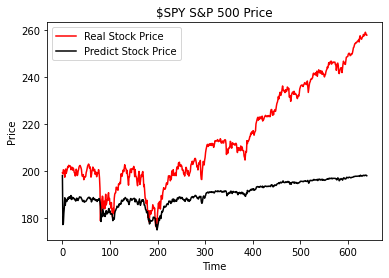

In [ ]:
plt.plot(spy_realprice, color = "red", label = "Real Stock Price")
plt.plot(predict_spy, color = "black", label = "Predict Stock Price")
plt.title("$SPY S&P 500 Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

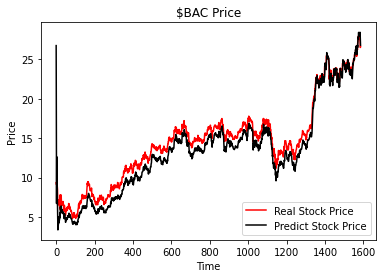

In [ ]:
plt.plot(bac_realprice, color = "red", label = "Real Stock Price")
plt.plot(predict_bac, color = "black", label = "Predict Stock Price")
plt.title("$BAC Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

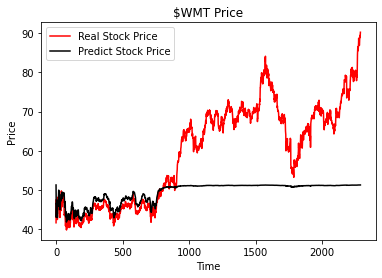

In [ ]:
plt.plot(wmt_realprice, color = "red", label = "Real Stock Price")
plt.plot(predict_wmt, color = "black", label = "Predict Stock Price")
plt.title("$WMT Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

<h1>LSTM Model

In [ ]:
regressor_spy_ltsm = Sequential()

regressor_spy_ltsm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_test_spy.shape[1],1)))
regressor_spy_ltsm.add(Dropout(0.2))

regressor_spy_ltsm.add(LSTM(units = 50, return_sequences = True))
regressor_spy_ltsm.add(Dropout(0.2))

regressor_spy_ltsm.add(LSTM(units = 50, return_sequences = True))
regressor_spy_ltsm.add(Dropout(0.2))

regressor_spy_ltsm.add(LSTM(units = 50))
regressor_spy_ltsm.add(Dropout(0.2))

regressor_spy_ltsm.add(Dense(units = 1))

In [ ]:
regressor_bac_ltsm = Sequential()

regressor_bac_ltsm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_test_bac.shape[1],1)))
regressor_bac_ltsm.add(Dropout(0.2))

regressor_bac_ltsm.add(LSTM(units = 50, return_sequences = True))
regressor_bac_ltsm.add(Dropout(0.2))

regressor_bac_ltsm.add(LSTM(units = 50, return_sequences = True))
regressor_bac_ltsm.add(Dropout(0.2))

regressor_bac_ltsm.add(LSTM(units = 50))
regressor_bac_ltsm.add(Dropout(0.2))

regressor_bac_ltsm.add(Dense(units = 1))

In [ ]:
regressor_wmt_ltsm = Sequential()

regressor_wmt_ltsm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_test_wmt.shape[1],1)))
regressor_wmt_ltsm.add(Dropout(0.2))

regressor_wmt_ltsm.add(LSTM(units = 50, return_sequences = True))
regressor_wmt_ltsm.add(Dropout(0.2))

regressor_wmt_ltsm.add(LSTM(units = 50, return_sequences = True))
regressor_wmt_ltsm.add(Dropout(0.2))

regressor_wmt_ltsm.add(LSTM(units = 50))
regressor_wmt_ltsm.add(Dropout(0.2))

regressor_wmt_ltsm.add(Dense(units = 1))

In [ ]:
regressor_spy_ltsm.compile(optimizer = "Adam", loss = "mse")

In [ ]:
regressor_bac_ltsm.compile(optimizer = "Adam", loss = "mse")

In [ ]:
regressor_wmt_ltsm.compile(optimizer = "Adam", loss = "mse")

In [ ]:
regressor_spy_ltsm.fit(X_train_spy, y_train_spy, epochs = 100, batch_size = 20) 

Epoch 1/100
126/126 [==============================] - 13s 59ms/step - loss: 0.0109
Epoch 2/100
126/126 [==============================] - 8s 60ms/step - loss: 0.0032
Epoch 3/100
126/126 [==============================] - 7s 59ms/step - loss: 0.0029
Epoch 4/100
126/126 [==============================] - 7s 59ms/step - loss: 0.0031
Epoch 5/100
126/126 [==============================] - 7s 59ms/step - loss: 0.0023
Epoch 6/100
126/126 [==============================] - 8s 60ms/step - loss: 0.0024
Epoch 7/100
126/126 [==============================] - 8s 60ms/step - loss: 0.0021
Epoch 8/100
126/126 [==============================] - 8s 60ms/step - loss: 0.0020
Epoch 9/100
126/126 [==============================] - 8s 60ms/step - loss: 0.0018
Epoch 10/100
126/126 [==============================] - 8s 60ms/step - loss: 0.0018
Epoch 11/100
126/126 [==============================] - 8s 60ms/step - loss: 0.0018
Epoch 12/100
126/126 [==============================] - 8s 60ms/step - loss: 0.0018


In [ ]:
regressor_bac_ltsm.fit(X_train_bac, y_train_bac, epochs = 100, batch_size = 20)

Epoch 1/100
316/316 [==============================] - 32s 76ms/step - loss: 0.0057
Epoch 2/100
316/316 [==============================] - 24s 77ms/step - loss: 0.0027
Epoch 3/100
316/316 [==============================] - 25s 80ms/step - loss: 0.0024
Epoch 4/100
316/316 [==============================] - 25s 79ms/step - loss: 0.0020
Epoch 5/100
316/316 [==============================] - 27s 85ms/step - loss: 0.0019
Epoch 6/100
316/316 [==============================] - 24s 76ms/step - loss: 0.0017
Epoch 7/100
316/316 [==============================] - 24s 77ms/step - loss: 0.0014
Epoch 8/100
316/316 [==============================] - 26s 81ms/step - loss: 0.0015
Epoch 9/100
316/316 [==============================] - 24s 76ms/step - loss: 0.0014
Epoch 10/100
316/316 [==============================] - 24s 77ms/step - loss: 0.0013
Epoch 11/100
316/316 [==============================] - 24s 76ms/step - loss: 0.0013
Epoch 12/100
316/316 [==============================] - 24s 76ms/step - lo

In [ ]:
regressor_wmt_ltsm.fit(X_train_wmt, y_train_wmt, epochs = 100, batch_size = 20)

Epoch 1/100
456/456 [==============================] - 41s 76ms/step - loss: 0.0034
Epoch 2/100
456/456 [==============================] - 34s 75ms/step - loss: 0.0017
Epoch 3/100
456/456 [==============================] - 35s 76ms/step - loss: 0.0015
Epoch 4/100
456/456 [==============================] - 36s 78ms/step - loss: 0.0013
Epoch 5/100
456/456 [==============================] - 35s 76ms/step - loss: 0.0013
Epoch 6/100
456/456 [==============================] - 34s 75ms/step - loss: 0.0012
Epoch 7/100
456/456 [==============================] - 36s 78ms/step - loss: 0.0012
Epoch 8/100
456/456 [==============================] - 35s 76ms/step - loss: 0.0011
Epoch 9/100
456/456 [==============================] - 35s 77ms/step - loss: 0.0011
Epoch 10/100
456/456 [==============================] - 35s 76ms/step - loss: 0.0011
Epoch 11/100
456/456 [==============================] - 36s 79ms/step - loss: 0.0010
Epoch 12/100
456/456 [==============================] - 36s 78ms/step - lo

In [ ]:
predict_spy_lstm = regressor_spy_ltsm.predict(X_test_spy)
predict_spy_lstm = spy_scaler.inverse_transform(predict_spy_lstm)

21/21 [==============================] - 2s 22ms/step


In [ ]:
predict_bac_lstm = regressor_bac_ltsm.predict(X_test_bac)
predict_bac_lstm = bac_scaler.inverse_transform(predict_bac_lstm)

50/50 [==============================] - 3s 23ms/step


In [ ]:
predict_wmt_lstm = regressor_wmt_ltsm.predict(X_test_wmt)
predict_wmt_lstm = wmt_scaler.inverse_transform(predict_wmt_lstm)

72/72 [==============================] - 3s 24ms/step


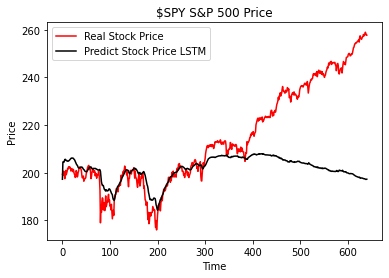

In [ ]:
plt.plot(spy_realprice, color = "red", label = "Real Stock Price")
plt.plot(predict_spy_lstm, color = "black", label = "Predict Stock Price LSTM")
plt.title("$SPY S&P 500 Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

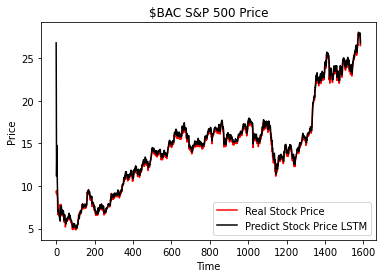

In [ ]:
plt.plot(bac_realprice, color = "red", label = "Real Stock Price")
plt.plot(predict_bac_lstm, color = "black", label = "Predict Stock Price LSTM")
plt.title("$BAC Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

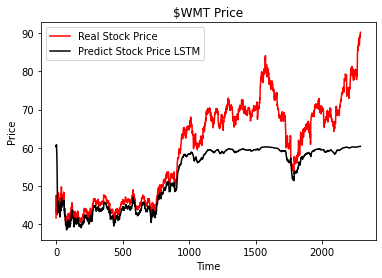

In [ ]:
plt.plot(wmt_realprice, color = "red", label = "Real Stock Price")
plt.plot(predict_wmt_lstm, color = "black", label = "Predict Stock Price LSTM")
plt.title("$WMT Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

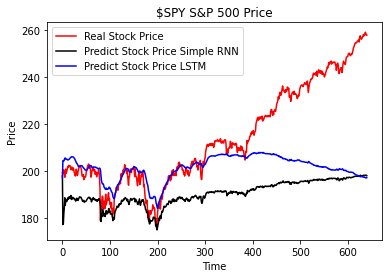

In [ ]:
plt.plot(spy_realprice, color = "red", label = "Real Stock Price")
plt.plot(predict_spy, color = "black", label = "Predict Stock Price Simple RNN")
plt.plot(predict_spy_lstm, color = "blue", label = "Predict Stock Price LSTM")
plt.title("$SPY S&P 500 Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

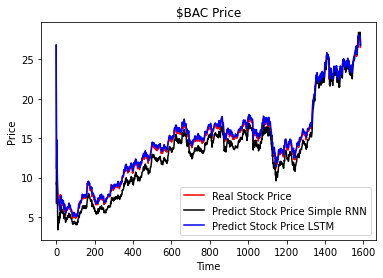

In [ ]:
plt.plot(bac_realprice, color = "red", label = "Real Stock Price")
plt.plot(predict_bac, color = "black", label = "Predict Stock Price Simple RNN")
plt.plot(predict_bac_lstm, color = "blue", label = "Predict Stock Price LSTM")
plt.title("$BAC Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

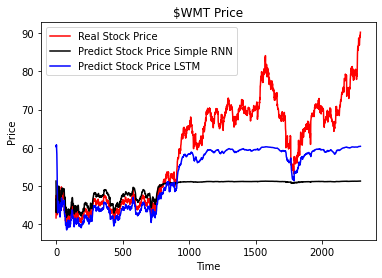

In [ ]:
plt.plot(wmt_realprice, color = "red", label = "Real Stock Price")
plt.plot(predict_wmt, color = "black", label = "Predict Stock Price Simple RNN")
plt.plot(predict_wmt_lstm, color = "blue", label = "Predict Stock Price LSTM")
plt.title("$WMT Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()